In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
df=pd.read_csv("uspsdata.txt",delimiter="\t", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.00,0.00,0.95,11.91,49.02,106.96,152.14,157.77,...,145.84,154.03,152.60,142.38,125.40,100.57,69.80,38.67,14.58,2.80
1,0.0,0.0,3.31,19.03,51.45,87.66,106.14,102.35,96.37,106.66,...,125.28,141.59,145.34,135.52,110.81,74.17,36.65,11.53,1.81,0.07
2,0.0,0.0,0.02,1.86,12.63,42.03,84.17,104.87,79.06,32.90,...,158.29,150.08,134.27,113.54,85.57,52.14,23.76,7.75,1.76,0.23
3,0.0,0.0,0.00,0.01,5.93,33.21,75.00,85.97,51.36,14.25,...,157.26,156.53,139.58,104.68,63.12,28.38,8.15,1.11,0.02,0.00
4,0.0,0.0,0.94,8.57,32.06,63.96,74.10,50.12,18.39,2.83,...,93.12,87.66,59.11,26.47,8.72,2.48,0.42,0.00,0.00,0.00


In [3]:
df_c=pd.read_csv("uspscl.txt",delimiter="\t", header = None)
df_c.columns = ["Y"]
df_c.head()


,Y
0,-1
1,-1
2,1
3,1
4,1


In [4]:
df_f = pd.concat([df, df_c],axis=1)
df_f.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,Y
0,0.0,0.0,0.00,0.00,0.95,11.91,49.02,106.96,152.14,157.77,...,154.03,152.60,142.38,125.40,100.57,69.80,38.67,14.58,2.80,-1
1,0.0,0.0,3.31,19.03,51.45,87.66,106.14,102.35,96.37,106.66,...,141.59,145.34,135.52,110.81,74.17,36.65,11.53,1.81,0.07,-1
2,0.0,0.0,0.02,1.86,12.63,42.03,84.17,104.87,79.06,32.90,...,150.08,134.27,113.54,85.57,52.14,23.76,7.75,1.76,0.23,1
3,0.0,0.0,0.00,0.01,5.93,33.21,75.00,85.97,51.36,14.25,...,156.53,139.58,104.68,63.12,28.38,8.15,1.11,0.02,0.00,1
4,0.0,0.0,0.94,8.57,32.06,63.96,74.10,50.12,18.39,2.83,...,87.66,59.11,26.47,8.72,2.48,0.42,0.00,0.00,0.00,1


In [5]:
import random
import csv
training = []
testing = []
l= len(df_f.index)
l

200

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_f, test_size=0.2)
#dataset = list(lines)

In [7]:
train.head()
len(train.index)

160

In [8]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,Y
77,0.0,0.0,0.58,6.23,22.29,38.49,35.31,16.64,3.18,0.00,...,39.86,49.97,56.17,42.84,18.66,3.70,0.13,0.00,0.00,1
12,0.0,0.0,0.00,0.23,1.61,5.63,13.80,27.09,44.65,64.60,...,127.04,137.61,134.56,108.24,64.76,25.40,5.33,0.36,0.00,-1
121,0.0,0.0,0.00,0.00,0.21,7.26,37.37,82.08,92.61,54.43,...,144.58,129.66,95.71,54.23,21.67,5.24,0.54,0.00,0.00,1
50,0.0,0.0,0.28,2.01,5.53,7.89,7.13,7.65,19.75,53.28,...,117.93,128.19,129.25,112.99,79.23,40.37,12.83,1.92,0.04,-1
155,0.0,0.0,0.02,0.83,5.62,20.55,49.97,87.75,116.96,122.20,...,153.69,133.48,106.29,78.07,49.76,24.71,8.45,1.72,0.16,1


In [9]:
len(test.index)

40

In [17]:
test_y = test["Y"] 
test_y = pd.Series.to_frame(test_y)
test_y = test_y.values.ravel()
test_y

array([ 1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
        1,  1, -1, -1,  1, -1])

In [10]:
train_y = train["Y"] 
train_y = pd.Series.to_frame(train_y)
train_y = train_y.values.ravel()
train_y

array([ 1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,
        1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,
        1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,
        1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1,  1, -1, -1,  1])

In [11]:
train_x = train.drop("Y", axis = 1)
train_x = train_x.values
train_x

array([[0.0000e+00, 0.0000e+00, 8.0000e-02, ..., 9.0000e-01, 5.0000e-02,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 5.8700e+00, 3.7000e-01,
        0.0000e+00],
       [2.5000e-01, 2.2600e+00, 8.0100e+00, ..., 1.1864e+02, 6.3260e+01,
        2.0270e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 7.0000e-01, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 6.1300e+00, 6.0000e-01,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 2.5000e-01, ..., 1.9990e+01, 7.4100e+00,
        1.6700e+00]])

In [12]:
svc = svm.SVC(kernel='poly', C=1,gamma=.1,probability = False).fit(train_x, train_y)

In [13]:
x_pred = svc.predict(train_x)
x_pred

array([ 1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,
        1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,
        1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,
        1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1,  1, -1, -1,  1])

In [14]:
train_y

array([ 1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,
        1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,
        1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,
        1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1,  1, -1, -1,  1])

In [15]:
test.head()#The 20% test data
len(test.index)

40

In [16]:
from sklearn.metrics import confusion_matrix 
confuse = confusion_matrix(train_y,x_pred)
print(confuse)

print("\nTN =",confuse[0][0])
print("FP =",confuse[0][1])
print("FN =",confuse[1][0])
print("TP =",confuse[1][1])

[[78  0]
 [ 0 82]]

TN = 78
FP = 0
FN = 0
TP = 82


In [18]:
from sklearn.metrics import confusion_matrix 
confuse = confusion_matrix(test_y,x_pred)
print(confuse)

print("\nTN =",confuse[0][0])
print("FP =",confuse[0][1])
print("FN =",confuse[1][0])
print("TP =",confuse[1][1])

ValueError: Found input variables with inconsistent numbers of samples: [40, 160]

In [159]:
accuracy_score(test_y, x_pred, normalize=False)

NameError: name 'accuracy_score' is not defined

In [160]:
svc1 = svm.SVC(kernel='rbf', C=500,gamma=.1,probability = True).fit(train_x, train_y)

In [162]:
x_pred1 = svc1.predict(train_x)
x_pred1

array([ 1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1,
        1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,
        1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,
        1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
       -1,  1, -1, -1,  1, -1, -1])

In [163]:
from sklearn.metrics import confusion_matrix 
confuse = confusion_matrix(train_y,x_pred)
print(confuse)

print("\nTN =",confuse[0][0])
print("FP =",confuse[0][1])
print("FN =",confuse[1][0])
print("TP =",confuse[1][1])

[[81  0]
 [ 0 79]]

TN = 81
FP = 0
FN = 0
TP = 79


In [157]:
x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 1
y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

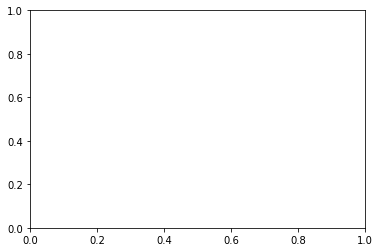

In [158]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap=plt.cm.Paired)
plt.xlabel('Pixel')
plt.ylabel('Category')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with polynomial kernel')
plt.show()

In [33]:

lines = csv.reader(df_f)
dataset = list(lines)
for x in range(l):
    for y in range(4):
        dataset[x][y] = float(dataset[x][y])
    if random.random() < 0.08:   
        training.append(dataset[x])
    else:
        test.append(dataset[x])

Error: iterator should return strings, not int (did you open the file in text mode?)

In [3]:
from PIL import Image

im = Image.new("RGB", (128, 128))
pix = im.load()
for x in range(128):
    for y in range(128):
        pix[x,y] = (0,255,255)

im.save("Image.png", "PNG")

In [10]:
from PIL import Image
im= Image.new('RGB', (1024, 1024))
im.putdata([(0,255,0)])
im.save('test.png')

In [53]:
X = df
Y = df_c
Y = Y.values.ravel()

In [55]:
svc = svm.SVC(kernel='poly', C=400,gamma=.1,probability = False).fit(X, Y)
svc

SVC(C=400, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with polynomial kernel')
plt.show()

In [18]:
df3 = df.head(1)
df3


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.95,11.91,49.02,106.96,152.14,157.77,...,145.84,154.03,152.6,142.38,125.4,100.57,69.8,38.67,14.58,2.8


In [36]:
#df3 = df3.values
df3 = df3.astype('int')
#print(len(df3))
df3

ValueError: invalid literal for int() with base 10: '0.00\t0.00\t3.31\t19.03\t51.45\t87.66\t106.14\t102.35\t96.37\t106.66\t129.21\t142.45\t123.71\t74.74\t27.05\t4.34\t0.00\t0.00\t4.73\t29.87\t85.43\t149.11\t184.86\t186.96\t178.38\t176.98\t181.42\t173.7

In [20]:
df3 = df3.values.tolist()
#df3 = df3.encode('utf-8')

In [21]:
df3

[[0.0,
  0.0,
  0.0,
  0.0,
  0.95,
  11.91,
  49.02,
  106.96,
  152.14,
  157.77,
  120.05,
  60.8,
  17.15,
  1.87,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.26,
  25.46,
  84.12,
  161.41,
  211.4,
  208.26,
  155.31,
  80.06,
  24.24,
  3.13,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.02,
  6.95,
  42.45,
  116.03,
  190.93,
  219.21,
  192.53,
  131.38,
  64.43,
  19.4,
  2.62,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.42,
  12.3,
  60.71,
  141.84,
  199.64,
  191.97,
  137.97,
  77.65,
  32.81,
  8.87,
  1.07,
  0.0,
  0.0,
  0.0,
  0.0,
  0.05,
  2.62,
  23.4,
  84.34,
  164.73,
  198.53,
  158.66,
  89.16,
  37.74,
  12.38,
  2.6,
  0.17,
  0.0,
  0.0,
  0.0,
  0.0,
  0.97,
  10.66,
  47.99,
  120.65,
  191.32,
  203.82,
  153.51,
  88.97,
  44.96,
  20.01,
  6.43,
  1.2,
  0.12,
  0.0,
  0.0,
  0.27,
  5.42,
  30.78,
  90.03,
  167.11,
  220.16,
  221.78,
  184.61,
  140.62,
  102.58,
  65.29,
  31.75,
  10.66,
  2.17,
  0.19,
  0.0,
  1.18,
  14.36,
  60.56,
  137.93,
  207.54

In [25]:
str1 = ''.join(str(e) for e in df3)
str1

'[0.0, 0.0, 0.0, 0.0, 0.95, 11.91, 49.02, 106.96, 152.14, 157.77, 120.05, 60.8, 17.15, 1.87, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.26, 25.46, 84.12, 161.41, 211.4, 208.26, 155.31, 80.06, 24.24, 3.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 6.95, 42.45, 116.03, 190.93, 219.21, 192.53, 131.38, 64.43, 19.4, 2.62, 0.0, 0.0, 0.0, 0.0, 0.0, 0.42, 12.3, 60.71, 141.84, 199.64, 191.97, 137.97, 77.65, 32.81, 8.87, 1.07, 0.0, 0.0, 0.0, 0.0, 0.05, 2.62, 23.4, 84.34, 164.73, 198.53, 158.66, 89.16, 37.74, 12.38, 2.6, 0.17, 0.0, 0.0, 0.0, 0.0, 0.97, 10.66, 47.99, 120.65, 191.32, 203.82, 153.51, 88.97, 44.96, 20.01, 6.43, 1.2, 0.12, 0.0, 0.0, 0.27, 5.42, 30.78, 90.03, 167.11, 220.16, 221.78, 184.61, 140.62, 102.58, 65.29, 31.75, 10.66, 2.17, 0.19, 0.0, 1.18, 14.36, 60.56, 137.93, 207.54, 238.09, 232.21, 207.66, 181.15, 157.42, 126.93, 83.93, 40.08, 11.89, 1.63, 0.0, 2.01, 20.93, 78.61, 159.98, 214.89, 222.78, 201.79, 171.9, 149.38, 146.43, 153.05, 137.78, 88.61, 35.2, 7.05, 0.0, 1.68, 17.47, 64.93, 129.17, 165.97, 1

In [40]:
str2 = str.encode(str1)
type(str2)
str2


b'[0.0, 0.0, 0.0, 0.0, 0.95, 11.91, 49.02, 106.96, 152.14, 157.77, 120.05, 60.8, 17.15, 1.87, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.26, 25.46, 84.12, 161.41, 211.4, 208.26, 155.31, 80.06, 24.24, 3.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 6.95, 42.45, 116.03, 190.93, 219.21, 192.53, 131.38, 64.43, 19.4, 2.62, 0.0, 0.0, 0.0, 0.0, 0.0, 0.42, 12.3, 60.71, 141.84, 199.64, 191.97, 137.97, 77.65, 32.81, 8.87, 1.07, 0.0, 0.0, 0.0, 0.0, 0.05, 2.62, 23.4, 84.34, 164.73, 198.53, 158.66, 89.16, 37.74, 12.38, 2.6, 0.17, 0.0, 0.0, 0.0, 0.0, 0.97, 10.66, 47.99, 120.65, 191.32, 203.82, 153.51, 88.97, 44.96, 20.01, 6.43, 1.2, 0.12, 0.0, 0.0, 0.27, 5.42, 30.78, 90.03, 167.11, 220.16, 221.78, 184.61, 140.62, 102.58, 65.29, 31.75, 10.66, 2.17, 0.19, 0.0, 1.18, 14.36, 60.56, 137.93, 207.54, 238.09, 232.21, 207.66, 181.15, 157.42, 126.93, 83.93, 40.08, 11.89, 1.63, 0.0, 2.01, 20.93, 78.61, 159.98, 214.89, 222.78, 201.79, 171.9, 149.38, 146.43, 153.05, 137.78, 88.61, 35.2, 7.05, 0.0, 1.68, 17.47, 64.93, 129.17, 165.97, 

In [57]:
from PIL import Image
im = Image.frombytes('RGB', (8,8), str2,'raw')
im.save("Image.png", "PNG")

In [58]:
from PIL import Image
import io
image = Image.open(io.BytesIO(str2))
image.show()

OSError: cannot identify image file <_io.BytesIO object at 0x7f715398dba0>